Final Project Submission

Student name: Deon Durrant

Student pace: self paced

Scheduled project review date/time:

Instructor name: Mark Bardour

Business and Data Understanding

The King Isle event coordinator is responsible for organizing and recommending movie screenings for the residents of the island. The coordinator's goal is to ensure that each resident is offered movies they are more inclined to watch and enjoy based on their previous movie preferences. King Isle’s movie recommendation system should be able to provide tailored movie suggestions for each resident, allowing them to have a more enjoyable viewing experience.

Problem Statement:
The event coordinator needs to provide top 5 personalized movie recommendations to each resident based on their previous movie ratings. By analyzing the historical ratings given by residents to other movies, the system should predict which movies each resident would likely enjoy in the future and prioritize the highest-rated ones.

# Exploratory Data Analysis


In [1]:
# Data collection 
import pandas as pd
df = pd.read_csv('ratings.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [2]:
df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

The ratings dataset has 100836 entries in four columns. There are no missing values. 

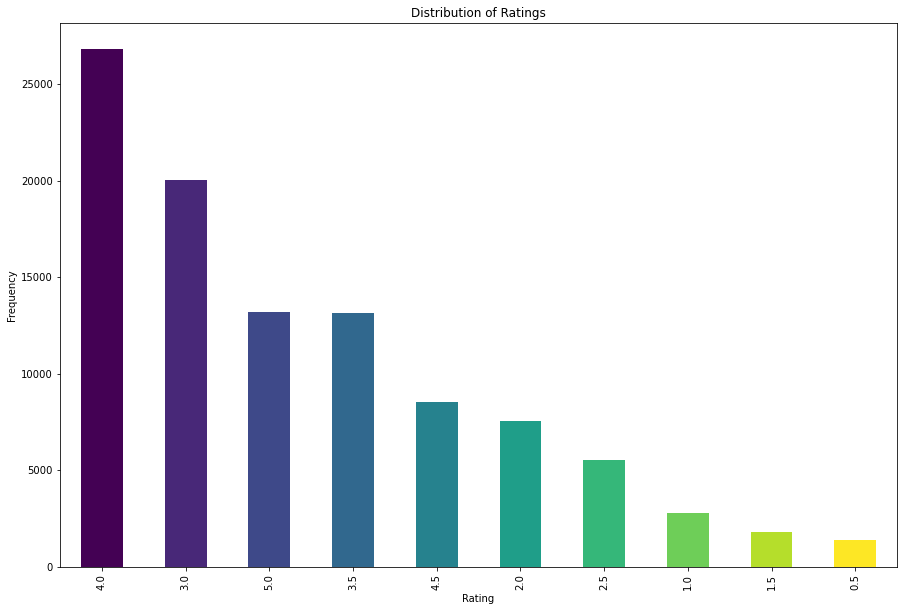

In [3]:
# Explore the rating distribution
import matplotlib.pyplot as plt 
import numpy as np
# visualize the rating column
rating_type= df['rating'].value_counts()
# Establish  figure size
plt.figure(figsize=(15, 10))
num_bars = len(rating_type)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars)) 
# Plot the data
rating_type.plot(kind='bar', color=colors)

# Label the plot
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")

# Show the plot
plt.show()

# Rating Distribution 
Rating are either implicit or explicit. Explicit ratings/feedback occurs when users directly rates the item for example giving a news item the thumbs down. In this case the explicit rating is on a scale 0-5.  Implicit rating/feedback makes assumptions about a user's preference based on their actions towards items for example how long the user interacted with the movies.

The data distributed indicates a positive ratings of movies  are more common. These higher ratings suggests that users are generally satisfied with the  movies. There may be a positive bias in the ratings. The data distibution and business task may influence the model's performance. 
.

In [4]:
# Calculate the percentage distribution of the rating column
rating_percentages = df['rating'].value_counts(normalize=True) * 100

# Display the percentages
print(rating_percentages)

4.0    26.595660
3.0    19.880797
5.0    13.101472
3.5    13.027093
4.5     8.480106
2.0     7.488397
2.5     5.503987
1.0     2.787695
1.5     1.776151
0.5     1.358642
Name: rating, dtype: float64


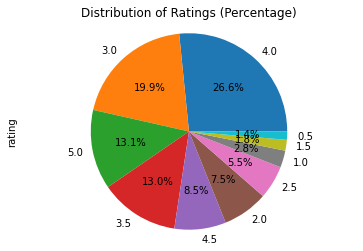

In [5]:
# Visualize the percentage rating 
rating_percentages.plot(kind='pie', autopct='%1.1f%%')

plt.title("Distribution of Ratings (Percentage)")
plt.axis('equal')

# Show the plot
plt.show()

# Ratings Percentage Distribution
Percentage distribution of ratings skews toward higher ratings, which could be an indication of positive bias.

* Ratings 4.0 and above: The combined percentage for ratings 4.0, 4.5, and 5.0 is about 48.17%. 4.0 (26.60%),
* Ratingd 3.0 to 3.5:  Makes  up 32.91% of the ratings 
* Ratings below 3.0: Account for a much smaller portion of the ratings ( 18.91%). 

Implication of this postive bias will likely skew recommendations toward high-rated movies and may not truly reflect the users' diverse preferences.

To address the issue the following strategies will be used .
* Normalization of the ratings  to account for individual user bias toward higher ratings.
* Regularization  of the ALS model to reduce the impact of extreme ratings.

 # Distribution of ratings across users
To understand the distribution of the number of ratings across many users the histogram will be used 

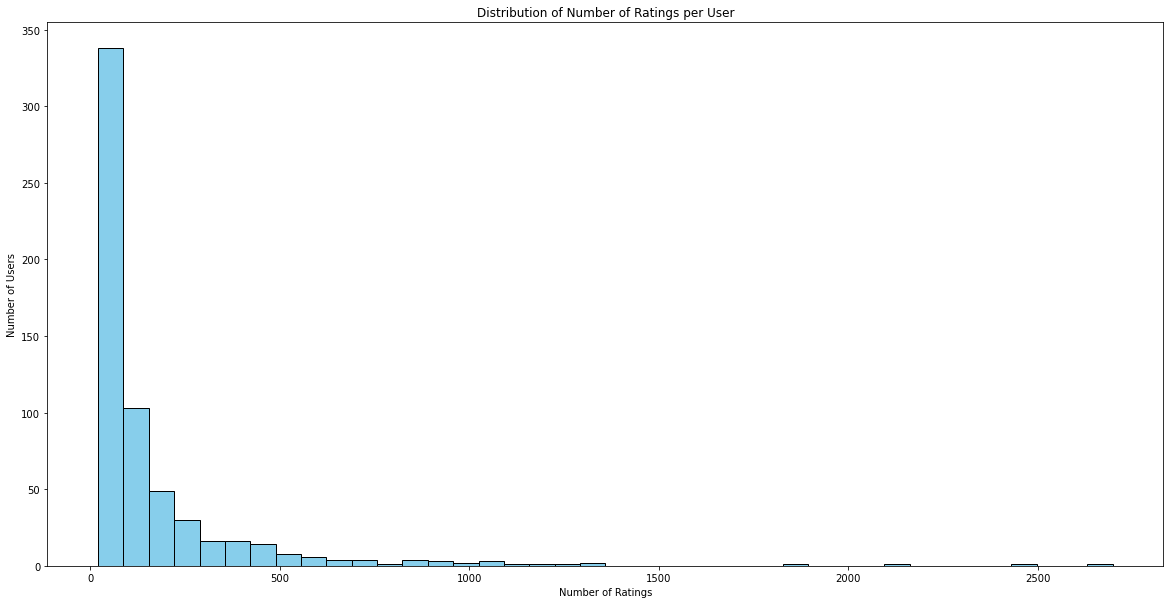

In [6]:
# Count the number of ratings per user
gb_user=df['userId'].value_counts()
# Plot the  distribution of the number of ratings by user
plt.figure(figsize=(20, 10))
plt.hist(gb_user, bins=40, color='skyblue', edgecolor='black')
plt.title("Distribution of Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()

# Distribution of Ratings Across Users

The majority of users fall into the first bin, suggesting that many users might have rated few movies. This suggest low engagement in terms of ratings. Since users maybe rating fewer items this maybe leading to sparse datasets. In contrast there are fewer user have with high rating engagements which could have a significant impact on the recommendation model. 

 To address sparsity matrix factorization techniques like Alternating Least Squares will be used. 